In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import numpy as np
%matplotlib inline

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
price = pd.read_csv("sample_submission.csv")

In [4]:
#Model with population variable
y = train["price_doc"].as_matrix()
test.index = test["id"];
price.index = price["id"] ; price.pop("id")
testp = pd.concat([test,price],axis=1)
def population(x):
    aux = x.split("_");
    return ("male" in aux or "female" in aux)

k1 = filter(population, train.keys())
k2 = filter(lambda x : "all" in x.split("_"), train.keys())

keys =k1+k2 +["full_sq"]
x = train[keys].as_matrix()
xt = testp[keys].as_matrix()
yt = testp["price_doc"].as_matrix()

In [5]:
mdl1 = linear_model.LinearRegression()
mdl1.fit(x,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [6]:
print(mdl1.score(x,y))
yp = mdl1.predict(xt)
err = yt -yp

0.205587007912


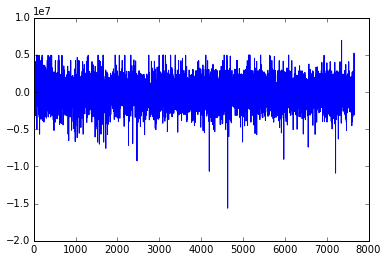

In [7]:
plt.plot(err)
plt.show()

In [8]:
x1 = train[[u"full_all",u"young_all",u"work_all",u"ekder_all","full_sq"]].as_matrix()
mdl2 = linear_model.LinearRegression()
mdl2.fit(x1,y)
print(mdl2.score(x1,y))
mdl2.coef_

0.156891232988


array([ -5.20293158e-01,   3.87925885e+01,  -2.97372188e+01,
         1.29125927e+02,   4.41700107e+04])

In [9]:
keys = keys + filter(lambda x : x.split("_")[-1]=="km", train.keys())
x2 = train[keys].fillna(value=0).as_matrix()
md3 = linear_model.LinearRegression()
md3.fit(x2,y)
print(md3.score(x2,y))

0.302927678964


In [10]:
keys = keys +filter(lambda x :"cafe" in x.split("_"), train.keys())
x3 = train[keys].fillna(value=0).as_matrix()
md4 = linear_model.LinearRegression()
md4.fit(x3,y)
print(md4.score(x3,y))

0.322884243396


In [11]:
line = train.iloc[1,:]
line

id                                                       2
timestamp                                       2011-08-23
full_sq                                                 34
life_sq                                                 19
floor                                                    3
max_floor                                              NaN
material                                               NaN
build_year                                             NaN
num_room                                               NaN
kitch_sq                                               NaN
state                                                  NaN
product_type                                    Investment
sub_area                                 Nagatinskij Zaton
area_m                                         9.58934e+06
raion_popul                                         115352
green_zone_part                                   0.372602
indust_part                                      0.04963

In [12]:
k = []
for key in line.keys():
    if isinstance(line[key],int) or isinstance(line[key],float):
        if(key != "price_doc" and key != "id"):
            k.append(key)

In [13]:
x4 = train[k].fillna(value=0).as_matrix()
xt4 = test[k].fillna(value=0).as_matrix()
md5 = linear_model.LinearRegression()
md5.fit(x4,y)
print(md5.score(x4,y))

0.42749745099


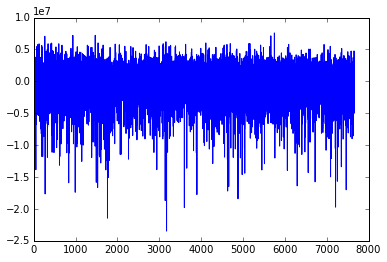

In [16]:
yp = md5.predict(xt4)
err = yt -yp

%matplotlib inline
plt.plot(err)

In [17]:
rfe = RFE(md5,10)
rfe.fit(x4,y)


KeyboardInterrupt: 

In [68]:
rang = rfe.ranking_
k1 =[]
for i in range(len(rang)):
    if (rang[i] <10):
        k1.append(k[i]);
print(k1)

['raion_build_count_with_material_info', 'build_count_block', 'build_count_wood', 'build_count_frame', 'build_count_brick', 'build_count_monolith', 'build_count_panel', 'build_count_foam', 'build_count_slag', 'build_count_mix', 'raion_build_count_with_builddate_info', 'build_count_before_1920', 'build_count_1921-1945', 'build_count_1946-1970', 'build_count_1971-1995', 'build_count_after_1995', 'cafe_count_5000_price_1500', 'cafe_count_5000_price_4000']


In [70]:
x5 = train[k1].fillna(value=0).as_matrix()
xt5 = test[k1].fillna(value=0).as_matrix()
md6 = linear_model.LinearRegression()
md6.fit(x5,y)
print(md6.score(x5,y))

0.106666798724


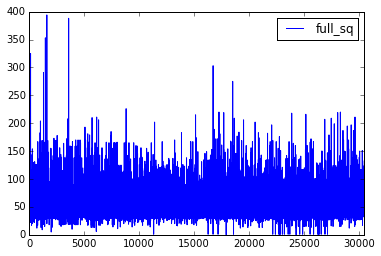

In [18]:
suf = train.get(["full_sq"])
suf1 = suf.loc[(suf["full_sq"]<400)].plot()
plt.show()

In [19]:
train1 = train.loc[(train["full_sq"] <200) & (train["full_sq"] >8) ]

surf = train1.get(["full_sq","life_sq"]).fillna(value=0).as_matrix();
target = train1.get(["price_doc"]).as_matrix();
mdl = linear_model.LinearRegression()
mdl.fit(surf,target)
print(mdl.score(surf,target))

0.373613404904


In [20]:
surfs = train1[["full_sq","life_sq"]]
surfs.head()

,full_sq,life_sq
0,43,27.0
1,34,19.0
2,43,29.0
3,89,50.0
4,77,77.0


In [21]:
inds =[]
for ind in surfs.index:
    line = surfs.loc[ind];
    if (line["full_sq"] < line["life_sq"]):
        aux =line["full_sq"];
        surfs.set_value(ind, "full_sq",line["life_sq"]);
        surfs.set_value(ind, "life_sq",aux);
        inds.append(ind);


In [22]:
nsurf = surfs.loc[(surfs["life_sq"].notnull())]
nsurf.head()

,full_sq,life_sq
0,43,27.0
1,34,19.0
2,43,29.0
3,89,50.0
4,77,77.0


In [23]:
rep = nsurf["life_sq"]/nsurf["full_sq"];
m = rep.mean()
m

0.63343611736369632

In [24]:
nulsurf = surfs.loc[(surfs["life_sq"].isnull())]
nulsurf.pop("life_sq")
nulsurf["life_sq"] = m*nulsurf["full_sq"]
nulsurf.head()

/home/eisti/.local/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,full_sq,life_sq
559,73,46.240837
624,110,69.677973
783,167,105.783832
824,53,33.572114
834,81,51.308326


In [25]:
surface = pd.concat([nsurf,nulsurf])
surface.head()

,full_sq,life_sq
0,43,27.0
1,34,19.0
2,43,29.0
3,89,50.0
4,77,77.0


In [26]:
mdl21 = linear_model.LinearRegression()
mdl21.fit(surface,target)
print(mdl21.score(surface,target))

0.000382683730449


In [27]:
surf0 = train1.get(["full_sq","life_sq"]).fillna(value=0);
mdl0 = linear_model.LinearRegression()
mdl0.fit(surf0.as_matrix(),target)
print(mdl0.score(surf0.as_matrix(),target))

0.373613404904


In [28]:
surf1 = surf0.copy()
for ind in surf1.index:
    line = surf1.loc[ind];
    if (line["full_sq"] < line["life_sq"]):
        aux =line["full_sq"];
        surf1.set_value(ind, "full_sq",line["life_sq"]);
        surf1.set_value(ind, "life_sq",aux);

mdl1 = linear_model.LinearRegression()
mdl1.fit(surf1.as_matrix(),target)
print(mdl1.score(surf1.as_matrix(),target))

0.179466600478


In [29]:
fsurf = surf0.loc[(surf0["full_sq"] >= surf0["life_sq"]) & surf0["life_sq"] != 0]
fsurf["rapport"] = fsurf["full_sq"]/fsurf["life_sq"]
m = fsurf["rapport"].mean()
print(m)
surf2 = surf0.copy()
for ind in surf2.index:
    line = surf2.loc[ind];
    if (line["full_sq"] < line["life_sq"]):
        aux =line["full_sq"];
        surf2.set_value(ind, "full_sq",line["life_sq"]*m);

mdl2 = linear_model.LinearRegression()
mdl2.fit(surf2.as_matrix(),target)
print(mdl2.score(surf2.as_matrix(),target))

/home/eisti/.local/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


2.53893926291
0.0400235973879


In [30]:
train2 = train.loc[(train["full_sq"] <200) & (train["full_sq"] >8) & (train["full_sq"] >= train["life_sq"]) ]

surf3 = train2.get(["full_sq","life_sq"]).fillna(value=0);
target1 = train2.get(["price_doc"]).as_matrix();
mdl3 = linear_model.LinearRegression()
mdl3.fit(surf3.as_matrix(),target1)
print(mdl.score(surf3.as_matrix(),target1))

0.386342919835


In [31]:
fsurf = surf3.loc[(surf3["life_sq"] != 0)]
fsurf["rapport"] = fsurf["life_sq"]/fsurf["full_sq"]
m = fsurf["rapport"].mean()
print(m)
surf4 = surf3.copy()
for ind in surf4.index:
    line = surf4.loc[ind];
    if (line["life_sq"]==0):
        surf2.set_value(ind, "life_sq",line["full_sq"]*m);

mdl4 = linear_model.LinearRegression()
mdl4.fit(surf4.as_matrix(),target1)
print(mdl2.score(surf4.as_matrix(),target1))

/home/eisti/.local/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


0.634691199264
0.0659874942644


In [153]:
mdl5 = linear_model.LinearRegression()
mdl5.fit(train2[k].fillna(value=0).as_matrix(),target1)
print(mdl5.score(train2[k].fillna(value=0).as_matrix(),target1))

0.580553550023


In [32]:
train5 = train.select_dtypes(include=["float64","int64"])
qte = train5.loc[(train5["full_sq"] <200) & (train5["full_sq"] !=0) & (train5["full_sq"] >= train5["life_sq"]) ]
target = qte.pop("price_doc");

x = qte.fillna(value=0).as_matrix()

mdl6 = linear_model.LinearRegression()
mdl6.fit(x,target);
print(mdl6.score(x,target))

0.576289109282


In [35]:
train1 = train.loc[(train["full_sq"] <320) & (train["full_sq"] >8)]
x= train1[k].fillna(value=0)
y = train1["price_doc"]
mdl = linear_model.LinearRegression()
mdl.fit(x,y)
print(mdl.score(x,y))

0.598345943929


In [36]:
train1["timestamp"] = pd.to_datetime(train1["timestamp"])


/home/eisti/.local/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [37]:
x["mois"] = train1.get(["timestamp"]).applymap(func = lambda x : x.month)
x["jour"] = train1.get(["timestamp"]).applymap(func = lambda x : x.day)
x["annee"] = train1.get(["timestamp"]).applymap(func = lambda x : x.year)

In [38]:
mdl = linear_model.LinearRegression()
mdl.fit(x,y)
print(mdl.score(x,y))

0.602342800746


In [39]:
categ = train1.select_dtypes(include=["object"]); 
xt = testp.select_dtypes(include=["object"]); xt.pop("timestamp")
for cat in categ.keys():
    lb = LabelEncoder()
    categ[cat] = lb.fit_transform(categ[cat])
    xt[cat] = lb.fit_transform(xt[cat])

xt.head()

/home/eisti/.local/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/eisti/.local/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,product_type,sub_area,culture_objects_top_25,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,water_1line,big_road1_1line,railroad_1line,ecology
id,,,,,,,,,,,,,,,
30474,33,38,0,0,0,0,0,0,0,0,0,0,0,0,4
30475,34,102,0,0,0,0,0,0,0,0,0,0,0,0,2
30476,33,84,0,1,0,1,1,0,0,0,0,0,0,0,3
30477,34,104,0,0,0,0,0,0,0,0,0,0,0,0,2
30478,34,102,0,0,0,0,0,0,0,0,0,0,0,0,2


In [40]:
model = linear_model.LinearRegression()
fulldata = pd.concat([categ,x],axis=1)
model.fit(fulldata,train1["price_doc"])
print(model.score(fulldata,train1["price_doc"]))

0.605864884966


In [42]:
xt2 = test.select_dtypes(include =["float64","int64"]).fillna(value=0)
test["timestamp"] = pd.to_datetime(test["timestamp"])
xt2["mois"] = test.get(["timestamp"]).applymap(func = lambda x : x.month)
xt2["jour"] = test.get(["timestamp"]).applymap(func = lambda x : x.day)
xt2["annee"] = test.get(["timestamp"]).applymap(func = lambda x : x.year)
xt2.pop("id"); 
fulltest = pd.concat([xt,xt2],axis=1)
yp = model.predict(fulltest)


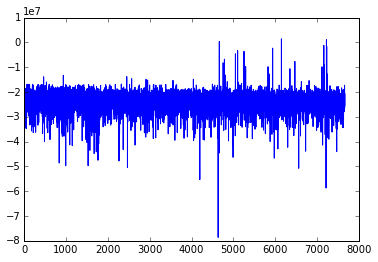

count    7.662000e+03
mean    -2.406408e+07
std      3.844293e+06
min     -7.863599e+07
25%     -2.584929e+07
50%     -2.362140e+07
75%     -2.177670e+07
max      1.438996e+06
Name: price_doc, dtype: float64

In [43]:
err = testp["price_doc"]- yp
plt.plot(err)
plt.show()
err.describe()

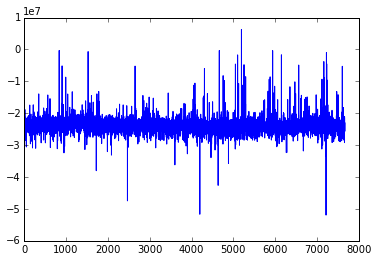

AttributeError: 'numpy.ndarray' object has no attribute 'describe'

In [46]:
model1 = RandomForestRegressor()
model1.fit(fulldata,train1["price_doc"])
err = model1.predict(fulltest)-yp
plt.plot(err)
plt.show()
err.describe()

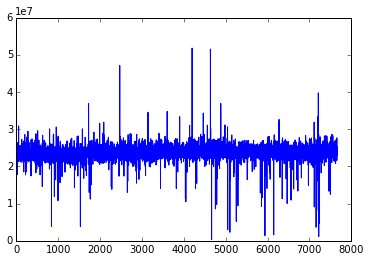

23671696.5457
51784841.8595
353920.017968


In [49]:
model2 = RandomForestRegressor(n_estimators=200,min_samples_leaf=5)
model2.fit(fulldata,train1["price_doc"])
err =yp - model2.predict(fulltest)
plt.plot(err)
plt.show()
print np.mean(err)
print np.max(err)
print np.min(err)